In [20]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [21]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [22]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)
random_scale = 1800

23 12
wvfrm = 
l =  0  SNR =  12.897105820959975  m1 =  23  m2 =  12
16 21
wvfrm = 
l =  1  SNR =  11.824037733292654  m1 =  16  m2 =  21
19 22
wvfrm = 
l =  2  SNR =  17.610890471572983  m1 =  19  m2 =  22
14 23
wvfrm = 
l =  3  SNR =  12.629920423869676  m1 =  14  m2 =  23
24 17
wvfrm = 
l =  4  SNR =  14.508458920866657  m1 =  24  m2 =  17
14 30
wvfrm = 
l =  5  SNR =  13.34098493719208  m1 =  14  m2 =  30
25 28
wvfrm = 
l =  6  SNR =  17.140507819043364  m1 =  25  m2 =  28
11 19
wvfrm = 
l =  7  SNR =  10.305830136621443  m1 =  11  m2 =  19
17 21
wvfrm = 
l =  8  SNR =  13.75107120315053  m1 =  17  m2 =  21
18 11
wvfrm = 
l =  9  SNR =  10.999044209416237  m1 =  18  m2 =  11
25 15
wvfrm = 
l =  10  SNR =  14.243717713716057  m1 =  25  m2 =  15
27 24
wvfrm = 
l =  11  SNR =  18.42194931870003  m1 =  27  m2 =  24
26 15
wvfrm = 
l =  12  SNR =  14.483290012552645  m1 =  26  m2 =  15
19 22
wvfrm = 
l =  13  SNR =  13.727568436511838  m1 =  19  m2 =  22
26 28
wvfrm = 
l =  14  SNR =  18

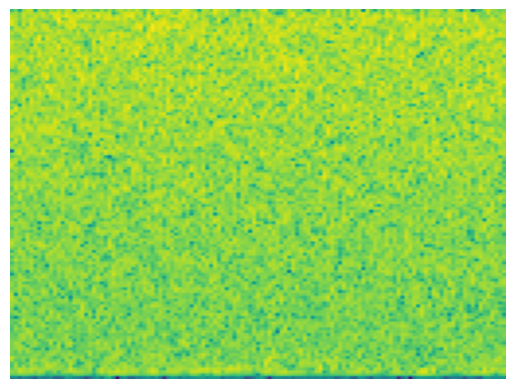

In [23]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 23
wvfrm = 
l =  100  SNR =  12.866216039290624  m1 =  11  m2 =  23
16 19
wvfrm = 
l =  101  SNR =  13.10034060608632  m1 =  16  m2 =  19
26 19
wvfrm = 
l =  102  SNR =  13.890388508829776  m1 =  26  m2 =  19
22 14
wvfrm = 
l =  103  SNR =  12.501055138840304  m1 =  22  m2 =  14
25 25
wvfrm = 
l =  104  SNR =  16.982130312156166  m1 =  25  m2 =  25
19 18
wvfrm = 
l =  105  SNR =  13.558973546174649  m1 =  19  m2 =  18
25 23
wvfrm = 
l =  106  SNR =  18.594821537655324  m1 =  25  m2 =  23
18 15
wvfrm = 
l =  107  SNR =  12.445652357407536  m1 =  18  m2 =  15
12 26
wvfrm = 
l =  108  SNR =  11.628724647844205  m1 =  12  m2 =  26
16 13
wvfrm = 
l =  109  SNR =  9.404788970042949  m1 =  16  m2 =  13
14 10
wvfrm = 
l =  110  SNR =  9.959805482672055  m1 =  14  m2 =  10
17 10
wvfrm = 
l =  111  SNR =  10.40114152657347  m1 =  17  m2 =  10
25 24
wvfrm = 
l =  112  SNR =  15.149432238698573  m1 =  25  m2 =  24
28 28
wvfrm = 
l =  113  SNR =  19.544491250971372  m1 =  28  m2 =  28
20 23
wvfr

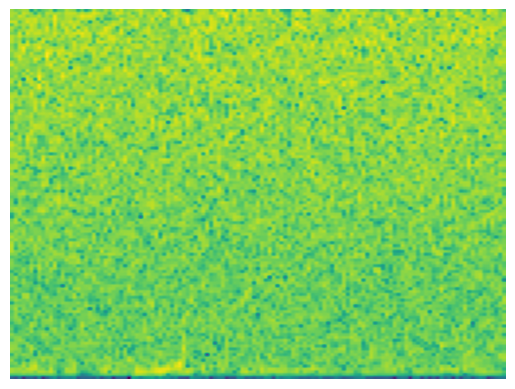

In [24]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 26
wvfrm = 
l =  200  SNR =  12.702526666932267  m1 =  10  m2 =  26
15 26
wvfrm = 
l =  201  SNR =  13.217041811006174  m1 =  15  m2 =  26
27 21
wvfrm = 
l =  202  SNR =  17.507306777360338  m1 =  27  m2 =  21
11 30
wvfrm = 
l =  203  SNR =  12.75344255108547  m1 =  11  m2 =  30
18 16
wvfrm = 
l =  204  SNR =  14.210988211475213  m1 =  18  m2 =  16
11 13
wvfrm = 
l =  205  SNR =  10.214071042174117  m1 =  11  m2 =  13
25 18
wvfrm = 
l =  206  SNR =  14.922331357064394  m1 =  25  m2 =  18
13 16
wvfrm = 
l =  207  SNR =  11.138948991123991  m1 =  13  m2 =  16
24 26
wvfrm = 
l =  208  SNR =  19.023308750118307  m1 =  24  m2 =  26
18 20
wvfrm = 
l =  209  SNR =  13.10778418796396  m1 =  18  m2 =  20
24 23
wvfrm = 
l =  210  SNR =  16.346684595919765  m1 =  24  m2 =  23
24 10
wvfrm = 
l =  211  SNR =  11.517350782690743  m1 =  24  m2 =  10
13 27
wvfrm = 
l =  212  SNR =  13.189930748420677  m1 =  13  m2 =  27
27 21
wvfrm = 
l =  213  SNR =  14.96897704677658  m1 =  27  m2 =  21
30 27
wvf

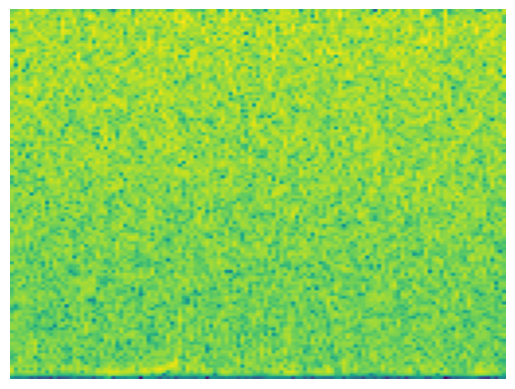

In [25]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 15
wvfrm = 
l =  300  SNR =  10.461922598554558  m1 =  11  m2 =  15
28 26
wvfrm = 
l =  301  SNR =  17.795760052732234  m1 =  28  m2 =  26
26 29
wvfrm = 
l =  302  SNR =  17.94169564118861  m1 =  26  m2 =  29
27 16
wvfrm = 
l =  303  SNR =  12.576367920009906  m1 =  27  m2 =  16
17 15
wvfrm = 
l =  304  SNR =  12.45169020830445  m1 =  17  m2 =  15
10 17
wvfrm = 
l =  305  SNR =  11.52551334029553  m1 =  10  m2 =  17
23 16
wvfrm = 
l =  306  SNR =  17.09069396281908  m1 =  23  m2 =  16
14 21
wvfrm = 
l =  307  SNR =  11.887043194792131  m1 =  14  m2 =  21
25 16
wvfrm = 
l =  308  SNR =  14.418489927436214  m1 =  25  m2 =  16
16 20
wvfrm = 
l =  309  SNR =  14.666598695837774  m1 =  16  m2 =  20
16 13
wvfrm = 
l =  310  SNR =  10.314248241756255  m1 =  16  m2 =  13
24 25
wvfrm = 
l =  311  SNR =  17.789075109299056  m1 =  24  m2 =  25
28 21
wvfrm = 
l =  312  SNR =  17.192173386979928  m1 =  28  m2 =  21
13 20
wvfrm = 
l =  313  SNR =  10.079757911302462  m1 =  13  m2 =  20
17 25
wvfr

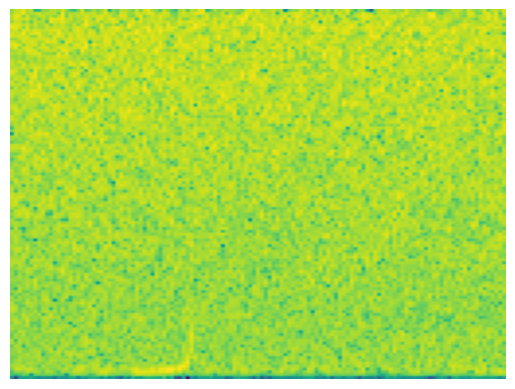

In [26]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 27
wvfrm = 
l =  400  SNR =  12.913258917061537  m1 =  11  m2 =  27
30 26
wvfrm = 
l =  401  SNR =  18.18280497544032  m1 =  30  m2 =  26
12 21
wvfrm = 
l =  402  SNR =  11.074453862137302  m1 =  12  m2 =  21
29 27
wvfrm = 
l =  403  SNR =  18.437069010188395  m1 =  29  m2 =  27
17 14
wvfrm = 
l =  404  SNR =  9.114397156803532  m1 =  17  m2 =  14
13 12
wvfrm = 
l =  405  SNR =  10.471721588885318  m1 =  13  m2 =  12
27 10
wvfrm = 
l =  406  SNR =  11.051692822144716  m1 =  27  m2 =  10
20 26
wvfrm = 
l =  407  SNR =  17.510015496457985  m1 =  20  m2 =  26
24 15
wvfrm = 
l =  408  SNR =  13.57315154383098  m1 =  24  m2 =  15
22 11
wvfrm = 
l =  409  SNR =  12.663152903940425  m1 =  22  m2 =  11
28 15
wvfrm = 
l =  410  SNR =  13.962614757472984  m1 =  28  m2 =  15
26 29
wvfrm = 
l =  411  SNR =  17.164693457516027  m1 =  26  m2 =  29
17 15
wvfrm = 
l =  412  SNR =  13.028310238240362  m1 =  17  m2 =  15
23 11
wvfrm = 
l =  413  SNR =  11.83459224558354  m1 =  23  m2 =  11
30 21
wvfr

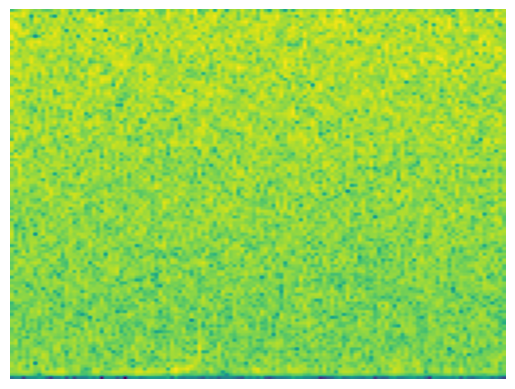

In [27]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [28]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

14 25
wvfrm = 
l =  500  SNR =  13.113177778764328  m1 =  14  m2 =  25
12 20
wvfrm = 
l =  501  SNR =  12.777005378180647  m1 =  12  m2 =  20
21 11
wvfrm = 
l =  502  SNR =  13.570136498944871  m1 =  21  m2 =  11
30 18
wvfrm = 
l =  503  SNR =  17.755408698856446  m1 =  30  m2 =  18
10 16
wvfrm = 
l =  504  SNR =  10.257913018501666  m1 =  10  m2 =  16
23 10
wvfrm = 
l =  505  SNR =  10.962673645032666  m1 =  23  m2 =  10
27 26
wvfrm = 
l =  506  SNR =  15.89020517608262  m1 =  27  m2 =  26
28 30
wvfrm = 
l =  507  SNR =  18.47060859635319  m1 =  28  m2 =  30
22 15
wvfrm = 
l =  508  SNR =  12.620946694925127  m1 =  22  m2 =  15
13 27
wvfrm = 
l =  509  SNR =  13.851215868153767  m1 =  13  m2 =  27
18 25
wvfrm = 
l =  510  SNR =  15.42500301765119  m1 =  18  m2 =  25
22 18
wvfrm = 
l =  511  SNR =  12.293164446348877  m1 =  22  m2 =  18
24 22
wvfrm = 
l =  512  SNR =  16.86863692347014  m1 =  24  m2 =  22
12 19
wvfrm = 
l =  513  SNR =  11.756642221521236  m1 =  12  m2 =  19
14 17
wvfr

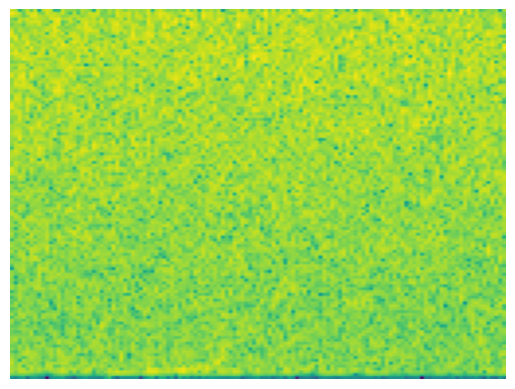

In [29]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 30
wvfrm = 
l =  600  SNR =  11.62099160149107  m1 =  11  m2 =  30
23 23
wvfrm = 
l =  601  SNR =  15.729001301733998  m1 =  23  m2 =  23
13 12
wvfrm = 
l =  602  SNR =  10.307172386150278  m1 =  13  m2 =  12
20 30
wvfrm = 
l =  603  SNR =  16.617356844490324  m1 =  20  m2 =  30
20 14
wvfrm = 
l =  604  SNR =  13.174740513203306  m1 =  20  m2 =  14
30 22
wvfrm = 
l =  605  SNR =  15.7550728769395  m1 =  30  m2 =  22
23 12
wvfrm = 
l =  606  SNR =  12.68487448565477  m1 =  23  m2 =  12
17 25
wvfrm = 
l =  607  SNR =  14.391145546741752  m1 =  17  m2 =  25
22 12
wvfrm = 
l =  608  SNR =  11.574565960906826  m1 =  22  m2 =  12
13 20
wvfrm = 
l =  609  SNR =  12.144837887931775  m1 =  13  m2 =  20
19 16
wvfrm = 
l =  610  SNR =  13.626570638732785  m1 =  19  m2 =  16
15 10
wvfrm = 
l =  611  SNR =  10.497122511864566  m1 =  15  m2 =  10
22 28
wvfrm = 
l =  612  SNR =  18.46993272382863  m1 =  22  m2 =  28
20 19
wvfrm = 
l =  613  SNR =  11.47558727250567  m1 =  20  m2 =  19
17 13
wvfrm 

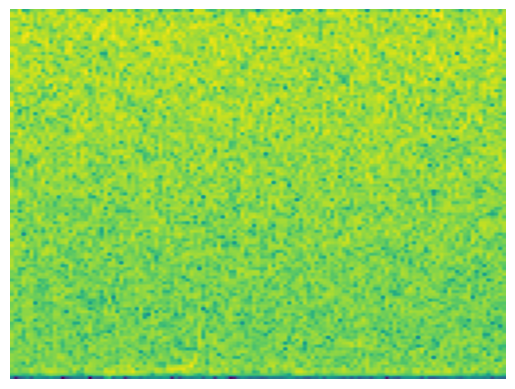

In [30]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 27
wvfrm = 
l =  700  SNR =  14.950479604754069  m1 =  18  m2 =  27
15 18
wvfrm = 
l =  701  SNR =  14.393542597535413  m1 =  15  m2 =  18
11 29
wvfrm = 
l =  702  SNR =  12.566552190097406  m1 =  11  m2 =  29
28 30
wvfrm = 
l =  703  SNR =  17.968893433830278  m1 =  28  m2 =  30
16 13
wvfrm = 
l =  704  SNR =  11.38249353896535  m1 =  16  m2 =  13
18 16
wvfrm = 
l =  705  SNR =  13.37231323995666  m1 =  18  m2 =  16
19 27
wvfrm = 
l =  706  SNR =  15.914466170300656  m1 =  19  m2 =  27
18 11
wvfrm = 
l =  707  SNR =  9.608774178853572  m1 =  18  m2 =  11
17 27
wvfrm = 
l =  708  SNR =  14.289220211742704  m1 =  17  m2 =  27
13 22
wvfrm = 
l =  709  SNR =  13.422554077027373  m1 =  13  m2 =  22
11 12
wvfrm = 
l =  710  SNR =  9.345986642320517  m1 =  11  m2 =  12
16 10
wvfrm = 
l =  711  SNR =  10.05936862798952  m1 =  16  m2 =  10
15 29
wvfrm = 
l =  712  SNR =  13.208030728074723  m1 =  15  m2 =  29
21 21
wvfrm = 
l =  713  SNR =  15.531836159087543  m1 =  21  m2 =  21
23 26
wvfrm

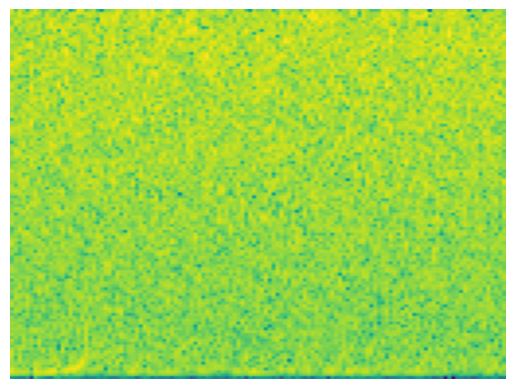

In [31]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

30 23
wvfrm = 
l =  800  SNR =  17.278595794951478  m1 =  30  m2 =  23
29 24
wvfrm = 
l =  801  SNR =  17.55893662838583  m1 =  29  m2 =  24
13 26
wvfrm = 
l =  802  SNR =  13.71084732737318  m1 =  13  m2 =  26
29 15
wvfrm = 
l =  803  SNR =  13.818092945073735  m1 =  29  m2 =  15
14 20
wvfrm = 
l =  804  SNR =  11.635245914432153  m1 =  14  m2 =  20
10 21
wvfrm = 
l =  805  SNR =  11.515847254421143  m1 =  10  m2 =  21
16 27
wvfrm = 
l =  806  SNR =  14.091448714214364  m1 =  16  m2 =  27
20 10
wvfrm = 
l =  807  SNR =  8.905575173506868  m1 =  20  m2 =  10
30 29
wvfrm = 
l =  808  SNR =  19.646541984564372  m1 =  30  m2 =  29
30 30
wvfrm = 
l =  809  SNR =  20.5328701664161  m1 =  30  m2 =  30
22 25
wvfrm = 
l =  809  SNR =  16.505367202940867  m1 =  22  m2 =  25
25 10
wvfrm = 
l =  810  SNR =  10.409881549029386  m1 =  25  m2 =  10
18 23
wvfrm = 
l =  811  SNR =  13.682447950411001  m1 =  18  m2 =  23
11 11
wvfrm = 
l =  812  SNR =  9.913550079030216  m1 =  11  m2 =  11
12 19
wvfrm 

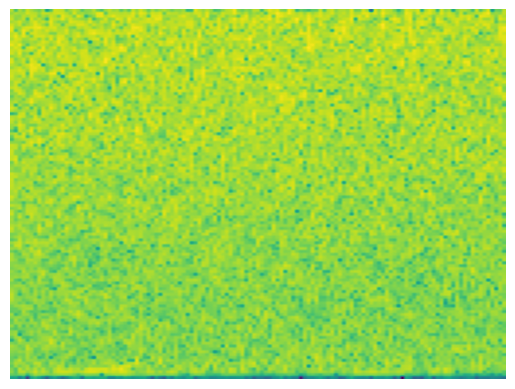

In [32]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

13 26
wvfrm = 
l =  900  SNR =  14.450781975179654  m1 =  13  m2 =  26
28 19
wvfrm = 
l =  901  SNR =  17.112673638461384  m1 =  28  m2 =  19
30 11
wvfrm = 
l =  902  SNR =  13.085384309942716  m1 =  30  m2 =  11
29 21
wvfrm = 
l =  903  SNR =  15.709598302472005  m1 =  29  m2 =  21
13 15
wvfrm = 
l =  904  SNR =  11.46651071917047  m1 =  13  m2 =  15
29 28
wvfrm = 
l =  905  SNR =  18.238531642919103  m1 =  29  m2 =  28
12 24
wvfrm = 
l =  906  SNR =  12.98688376322874  m1 =  12  m2 =  24
25 11
wvfrm = 
l =  907  SNR =  10.611650667476846  m1 =  25  m2 =  11
11 19
wvfrm = 
l =  908  SNR =  10.745755669091437  m1 =  11  m2 =  19
28 21
wvfrm = 
l =  909  SNR =  16.91670330817182  m1 =  28  m2 =  21
14 25
wvfrm = 
l =  910  SNR =  14.214426814988816  m1 =  14  m2 =  25
25 12
wvfrm = 
l =  911  SNR =  10.781273773189588  m1 =  25  m2 =  12
19 19
wvfrm = 
l =  912  SNR =  14.42884787525394  m1 =  19  m2 =  19
22 14
wvfrm = 
l =  913  SNR =  15.0593224499369  m1 =  22  m2 =  14
13 14
wvfrm 

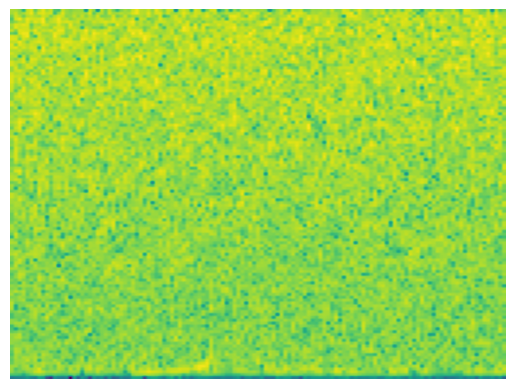

In [33]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 14
wvfrm = 
l =  1000  SNR =  12.475052377993391  m1 =  24  m2 =  14
20 26
wvfrm = 
l =  1001  SNR =  16.849892008527394  m1 =  20  m2 =  26
17 13
wvfrm = 
l =  1002  SNR =  10.439908477998005  m1 =  17  m2 =  13
29 27
wvfrm = 
l =  1003  SNR =  19.338180439637316  m1 =  29  m2 =  27
18 14
wvfrm = 
l =  1004  SNR =  11.32652160261351  m1 =  18  m2 =  14
10 11
wvfrm = 
l =  1005  SNR =  10.909521526530733  m1 =  10  m2 =  11
23 26
wvfrm = 
l =  1006  SNR =  16.887655140423266  m1 =  23  m2 =  26
20 21
wvfrm = 
l =  1007  SNR =  14.531579965933428  m1 =  20  m2 =  21
29 10
wvfrm = 
l =  1008  SNR =  11.224007590591535  m1 =  29  m2 =  10
14 16
wvfrm = 
l =  1009  SNR =  10.634514214100188  m1 =  14  m2 =  16
29 12
wvfrm = 
l =  1010  SNR =  14.326049170543813  m1 =  29  m2 =  12
12 23
wvfrm = 
l =  1011  SNR =  14.784211865187665  m1 =  12  m2 =  23
26 19
wvfrm = 
l =  1012  SNR =  16.158384083269357  m1 =  26  m2 =  19
27 14
wvfrm = 
l =  1013  SNR =  13.108512524897558  m1 =  27  m2

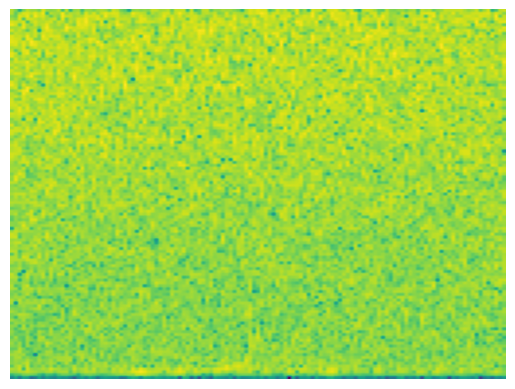

In [34]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 22
wvfrm = 
l =  1100  SNR =  16.423064652396093  m1 =  25  m2 =  22
14 28
wvfrm = 
l =  1101  SNR =  13.760146870563835  m1 =  14  m2 =  28
20 14
wvfrm = 
l =  1102  SNR =  12.424948378402744  m1 =  20  m2 =  14
27 24
wvfrm = 
l =  1103  SNR =  18.067337508339055  m1 =  27  m2 =  24
22 16
wvfrm = 
l =  1104  SNR =  15.565968446211528  m1 =  22  m2 =  16
16 22
wvfrm = 
l =  1105  SNR =  13.41532234978686  m1 =  16  m2 =  22
28 21
wvfrm = 
l =  1106  SNR =  17.364703804699296  m1 =  28  m2 =  21
17 11
wvfrm = 
l =  1107  SNR =  11.946802462790965  m1 =  17  m2 =  11
26 30
wvfrm = 
l =  1108  SNR =  19.039435129437432  m1 =  26  m2 =  30
30 19
wvfrm = 
l =  1109  SNR =  16.247028015157085  m1 =  30  m2 =  19
20 20
wvfrm = 
l =  1110  SNR =  14.553108186392476  m1 =  20  m2 =  20
22 12
wvfrm = 
l =  1111  SNR =  10.993086092844866  m1 =  22  m2 =  12
20 20
wvfrm = 
l =  1112  SNR =  16.063019753233032  m1 =  20  m2 =  20
12 18
wvfrm = 
l =  1113  SNR =  11.50455480720859  m1 =  12  m2 

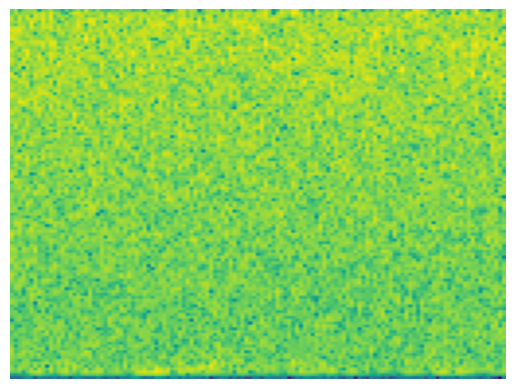

In [35]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 23
wvfrm = 
l =  1200  SNR =  12.62653877512276  m1 =  16  m2 =  23
13 26
wvfrm = 
l =  1201  SNR =  14.340647172723457  m1 =  13  m2 =  26
26 10
wvfrm = 
l =  1202  SNR =  11.61849477097053  m1 =  26  m2 =  10
22 11
wvfrm = 
l =  1203  SNR =  12.546932459718336  m1 =  22  m2 =  11
30 21
wvfrm = 
l =  1204  SNR =  15.67635566833493  m1 =  30  m2 =  21
29 28
wvfrm = 
l =  1205  SNR =  19.429083258715522  m1 =  29  m2 =  28
11 17
wvfrm = 
l =  1206  SNR =  11.429171049115935  m1 =  11  m2 =  17
13 29
wvfrm = 
l =  1207  SNR =  13.507088742669575  m1 =  13  m2 =  29
29 28
wvfrm = 
l =  1208  SNR =  18.40115814690037  m1 =  29  m2 =  28
27 21
wvfrm = 
l =  1209  SNR =  15.203147867274403  m1 =  27  m2 =  21
16 23
wvfrm = 
l =  1210  SNR =  15.001414548894337  m1 =  16  m2 =  23
18 13
wvfrm = 
l =  1211  SNR =  11.607490893496742  m1 =  18  m2 =  13
19 28
wvfrm = 
l =  1212  SNR =  16.08870530479807  m1 =  19  m2 =  28
23 24
wvfrm = 
l =  1213  SNR =  15.122749883251817  m1 =  23  m2 =  

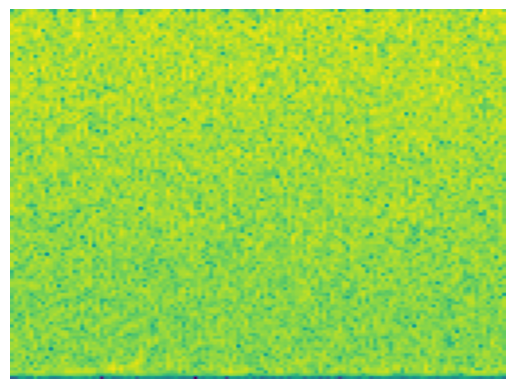

In [36]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 11
wvfrm = 
l =  1300  SNR =  13.204979002242418  m1 =  19  m2 =  11
26 16
wvfrm = 
l =  1301  SNR =  13.99433591878757  m1 =  26  m2 =  16
19 12
wvfrm = 
l =  1302  SNR =  10.964004402095938  m1 =  19  m2 =  12
17 23
wvfrm = 
l =  1303  SNR =  15.094039806816468  m1 =  17  m2 =  23
30 29
wvfrm = 
l =  1304  SNR =  17.44901420273998  m1 =  30  m2 =  29
26 19
wvfrm = 
l =  1305  SNR =  12.940071271869316  m1 =  26  m2 =  19
15 17
wvfrm = 
l =  1306  SNR =  13.365609873987  m1 =  15  m2 =  17
25 25
wvfrm = 
l =  1307  SNR =  16.919054516519484  m1 =  25  m2 =  25
20 13
wvfrm = 
l =  1308  SNR =  10.606277179211634  m1 =  20  m2 =  13
27 23
wvfrm = 
l =  1309  SNR =  16.452315398807784  m1 =  27  m2 =  23
29 18
wvfrm = 
l =  1310  SNR =  16.326011094953625  m1 =  29  m2 =  18
29 15
wvfrm = 
l =  1311  SNR =  16.80687458801127  m1 =  29  m2 =  15
22 12
wvfrm = 
l =  1312  SNR =  12.4450078747961  m1 =  22  m2 =  12
27 30
wvfrm = 
l =  1313  SNR =  18.700986831011647  m1 =  27  m2 =  30


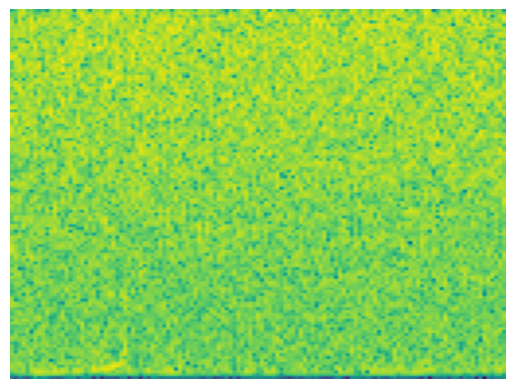

In [37]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 19
wvfrm = 
l =  1400  SNR =  12.384066859020917  m1 =  20  m2 =  19
10 12
wvfrm = 
l =  1401  SNR =  8.442214178795254  m1 =  10  m2 =  12
15 22
wvfrm = 
l =  1402  SNR =  15.21165461585992  m1 =  15  m2 =  22
11 21
wvfrm = 
l =  1403  SNR =  11.037804466110943  m1 =  11  m2 =  21
16 28
wvfrm = 
l =  1404  SNR =  15.654792375042044  m1 =  16  m2 =  28
20 16
wvfrm = 
l =  1405  SNR =  14.108745623953194  m1 =  20  m2 =  16
21 19
wvfrm = 
l =  1406  SNR =  14.010081617773094  m1 =  21  m2 =  19
25 16
wvfrm = 
l =  1407  SNR =  13.742078799216381  m1 =  25  m2 =  16
13 25
wvfrm = 
l =  1408  SNR =  11.839146757195737  m1 =  13  m2 =  25
18 30
wvfrm = 
l =  1409  SNR =  12.859173705151271  m1 =  18  m2 =  30
16 11
wvfrm = 
l =  1410  SNR =  11.009511989905318  m1 =  16  m2 =  11
20 27
wvfrm = 
l =  1411  SNR =  14.745201154094206  m1 =  20  m2 =  27
21 26
wvfrm = 
l =  1412  SNR =  17.230293128048167  m1 =  21  m2 =  26
15 18
wvfrm = 
l =  1413  SNR =  12.990237335104894  m1 =  15  m2 

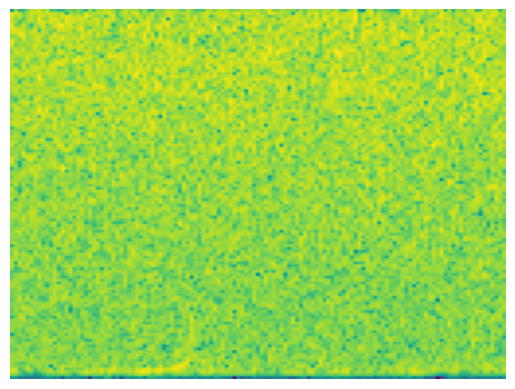

In [38]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+8000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
